[View in Colaboratory](https://colab.research.google.com/github/khandelwal1998/BigMartSales_Eda_Prediction/blob/master/Sale_Mart.ipynb)

<font color="#001a33" size=15px>Big mart sales analysis</font>

<font face="Verdana" size=3px>This project aims in analyzing the sales ofeach product in a particular shop.
Machine learning play a vital role in these kind of predictions ad help a lot in increasing the business.
<br>
I am working on the big mart sales dataset which was collected by data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.<br>

To get a good result we will follow a step by step process which will include:</font>

1. Getting the data
3. Data preprocessing
2. EDA on the data to get a good idea of each trends.
4. Feature Engineering
5. Training the model.
6. Evaluation of the model.

## importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statistics
from scipy.stats import mode

Lets import the dataset.

The data set is available at [here](https://drive.google.com/file/d/1sukL3ljrJIhgW3NbsnKoayGd7Pfy-gqo/view)

In [2]:
from google.colab import files
files.upload()

Saving Big_mart.csv to Big_mart.csv


{'Big_mart.csv': b'Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales\r\nFDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138\r\nDRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228\r\nFDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27\r\nFDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38\r\nNCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052\r\nFDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088\r\nFDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528\r\nFDP10,,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type

In [0]:
data=pd.read_csv("Big_mart.csv")

In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Check out few rows of the dataset.

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<font color="#001a33" size=6px>Atribute Information</font>

1. Item_Identifire: Unique id for each product. Each identifier contains two letters in starting which tells whether the item is food , drinks or non consumeable. So later we can arrange them in category using this.
2. Item_weigth: Wight of the product.
3. Item_fat_content: Whether the product has low fat content or normal.
4. Item_Visibility:The  of total display area of all products in a store alloated to the particular       product.
5. Item_Type: The category of each item.
6. Item_MRP: Price of each item.
7. Outlet_Identifier: Unique store id
8. Outlet_establishment_year: Year the outlet was estd.
9. Outlet_Size: Size of the outlet in terms of ground area.
10. Outlet_Location_Type: The type of city where the outlet is located.
11. Outlet_Type: Outlet is grocery store or supermarket
12. Item_Outlet_Sales: Output variable


In [6]:
data.shape

(8523, 12)

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Preprocessing

In [8]:
len(data['Item_Identifier'].unique())

1559

There are total of 1559 products available and total 10 outlets in all.


In the above description there are two things that are important to be noticed:

First is regarding the fat. According to the data there are only Two categories: Low fat and regular, but there are 5 unique values so lets check them out.

In [9]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

So the problem arised due to naming of variables so lets combine the similar ones.

In [0]:
data.loc[(data['Item_Fat_Content']=="LF") | (data['Item_Fat_Content']=='low fat') , 'Item_Fat_Content' ]="Low Fat"
data.loc[(data['Item_Fat_Content']=="reg")  , 'Item_Fat_Content' ]="Regular"

In [11]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

The other Problem is with the item visibility. Some of the item visibility is 0 but it cant be. so fill it with the mean of that column.

In [0]:
data.loc[data['Item_Visibility']==0,'Item_Visibility']=data['Item_Visibility'].mean()

## Removal of NULL values

In [13]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item weight null values need to be filled by the mean weight of the items of that particular value.

In [0]:
val=data.groupby(['Item_Identifier'])['Item_Weight'].mean()

In [0]:
data.loc[data['Item_Weight'].isnull(),'Item_Weight']=data.loc[data['Item_Weight'].isnull(),'Item_Identifier'].apply(lambda x:val[x])


In [16]:
data[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [0]:
data.drop([927,1922,4187,5022],inplace=True)

In [18]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

To fill the outlet size null values we can take help of item identifier. We will compute mode outlet size of particular item identifier and store it into the null place

In [0]:
data.loc[data['Outlet_Size'].isnull(),'Outlet_Size']='missing'

In [20]:
val2=data.groupby(['Item_Identifier'])['Outlet_Size'].apply(lambda x:mode(x).mode[0])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [0]:
#data.loc[data['Outlet_Size'].isnull(),'Outlet_Size']=data.loc[data['Outlet_Size'].isnull(),'Item_Identifier'].apply(lambda x:val[x])


Since using the item identifier we see still we have  nan values so we will use the outlet_type to predict the mising values of outlet_size

In [21]:
val2=data.groupby(['Outlet_Type'])['Outlet_Size'].apply(lambda x:mode(x).mode[0])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [0]:
data.loc[data['Outlet_Size']=='missing','Outlet_Size']=data.loc[data['Outlet_Size']=='missing','Outlet_Type'].apply(lambda x:val2[x])


In [23]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
val2

Outlet_Type
Grocery Store        missing
Supermarket Type1      Small
Supermarket Type2     Medium
Supermarket Type3     Medium
Name: Outlet_Size, dtype: object

# EDA

## Univariate analysis

## Item weigth : Reg plot

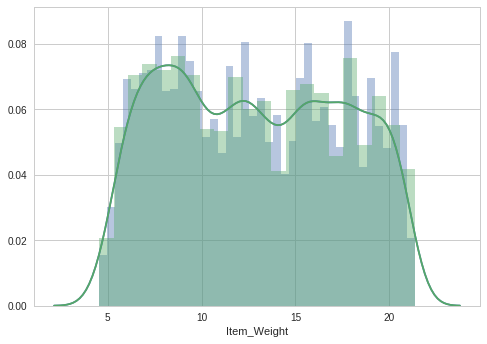

In [25]:
sns.set(style="whitegrid", color_codes=True)
sns.distplot(data['Item_Weight'],bins=40)
sns.distplot(data['Item_Weight'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


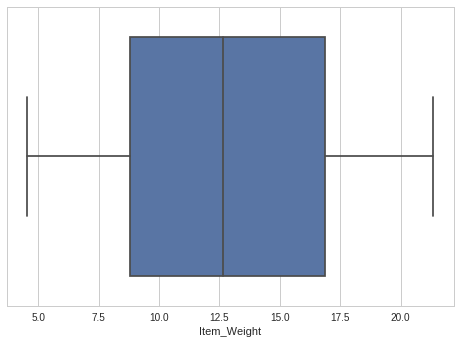

In [26]:
sns.boxplot(data['Item_Weight'])

1. There are no outliers present in the Weigth column
2. By observing the describe method we can make a hypothesis that the price does not depend much on weigth.

## Item type : Countplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


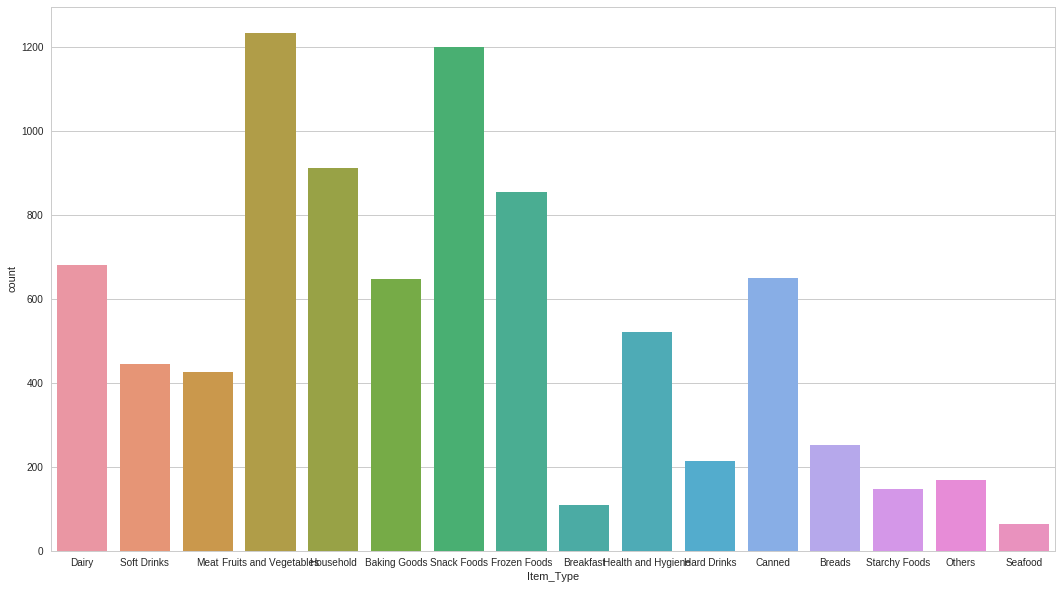

In [27]:
plt.figure(figsize=(18,10))
sns.set(style='whitegrid',color_codes=True)
sns.countplot(data['Item_Type'])

The most sold items are the fruits and veggetables and the least ones are the seafood

## Item Fat content : Count plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


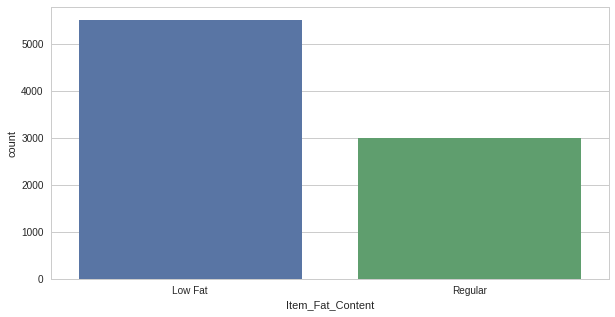

In [28]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.countplot(data['Item_Fat_Content'])

From this it is clear that the low fat products are sold more compared to regular fat.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


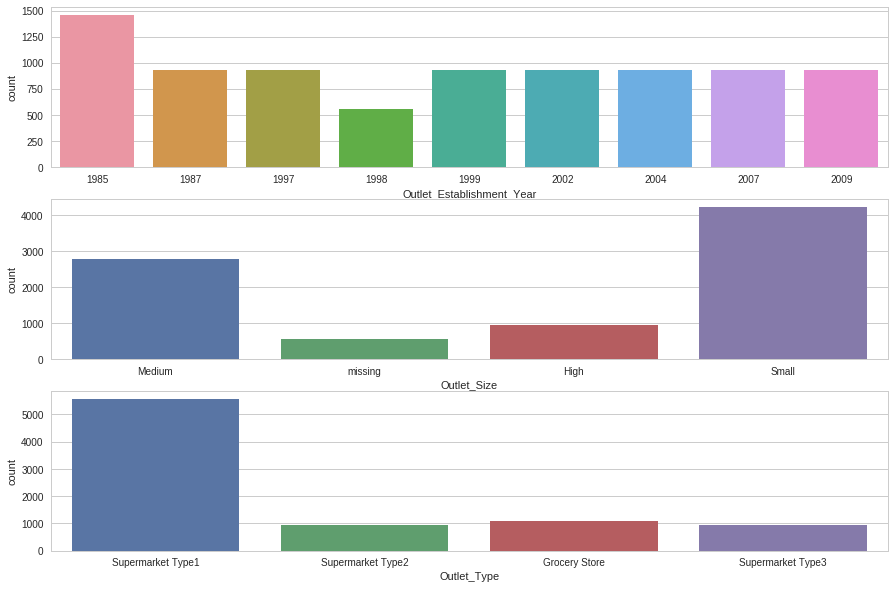

In [29]:

sns.set(style='whitegrid',color_codes=True)
fig , (ax1,ax2,ax3)=plt.subplots(nrows=3,figsize=(15,10))
sns.countplot(data['Outlet_Establishment_Year'],ax=ax1)
sns.countplot(data['Outlet_Size'],ax=ax2)
sns.countplot(data['Outlet_Type'],ax=ax3)

This shows that the most of the shops are of supermarket Type1 and veryfew of them are of high size outlet.

Lets check out the bivariate analysis to get a feature showing strong tred with the output sales.

# Bivariate Analysis

In [30]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017485,0.025975,-0.013426,0.013168
Item_Visibility,-0.017485,1.000000,-0.005116,-0.077878,-0.133788
Item_MRP,0.025975,-0.005116,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.077878,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.133788,0.567803,-0.049083,1.000000


## MRP - Output sales

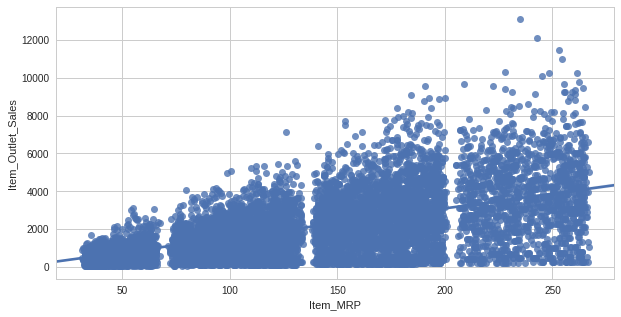

In [31]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

## Weight - Sales 

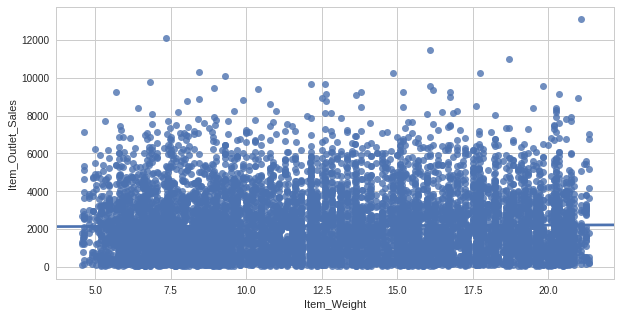

In [32]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=data)

## Item visibilty - Output sales

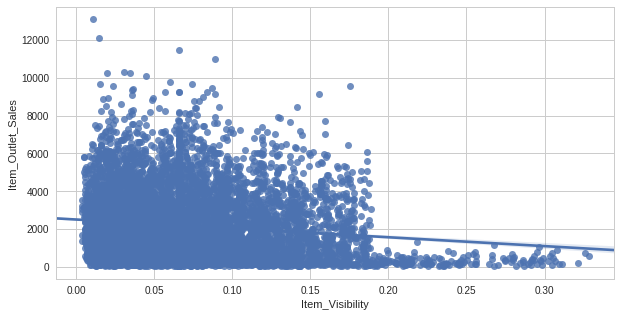

In [33]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=data)

## Outlet_Establishment_Year - Output sales

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


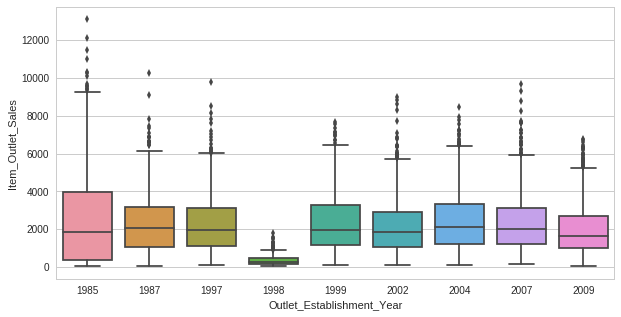

In [34]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

## Output Location type - Output sales

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


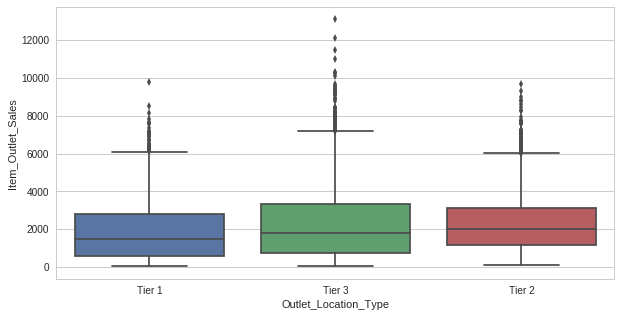

In [35]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

## Outlet Type - Output sales

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


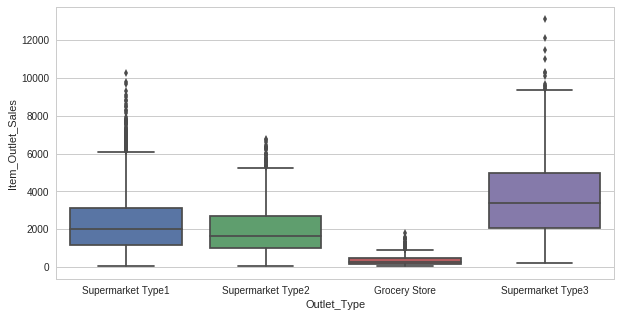

In [36]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

## Inferences:


From the above univariate analysis we have seen the followng observations:

1. The item weight shows is not much important to us as it does not show any trend clearly. So we can deop the column before model training.
2. The lesser fat foods are preffered by people so it can be a good feature.
3. The item visibility shows a negative correlation with the data which means it should be less for more sales output.
4. The item type has 16 categories which dont tell much about the trend so we have to change them using the information provided into its item identifier.
5. The item mrp shows as positive trend so we will leave it as it is for our model.
6. From outlet_establishment_year and output sales box plot we infer that the outlet which are old have sales greater than those outlet which are new. So as these are categorical value and have a large unique numbers, we will change it to continous by finding the total active working year of that shop.
7. Outlet size and type just need to be label encoded.
8. Outlet location type has mostly same values for all three types so we can drop it either too.

# Feature Engineering

In [37]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

There are a total 16 types of item and if we pass this in the model, it will be  a mess. So lets use the the item identifier to categorically arrange these values.

In [0]:
data['Item_Type']=data['Item_Identifier'].apply(lambda x: x[0:2])

In [39]:
data['Item_Type'].value_counts()

FD    6121
NC    1599
DR     799
Name: Item_Type, dtype: int64

In [40]:
data.shape

(8519, 12)

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,FD,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,DR,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,FD,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,FD,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,NC,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
data.loc[data['Item_Type']=='NC','Item_Fat_Content']='Non Edible'

Using label encoding to change th string values to integers

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()

In [0]:
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=le.fit_transform(data['Item_Type'])
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

In [0]:
data['Total_Year']=0
data['Total_Year']=data['Outlet_Establishment_Year'].apply(lambda x: 2013-x)

In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Total_Year
0,FDA15,9.30,0,0.016047,1,249.8092,OUT049,1999,1,0,1,3735.1380,14
1,DRC01,5.92,2,0.019278,0,48.2692,OUT018,2009,1,2,2,443.4228,4
2,FDN15,17.50,0,0.016760,1,141.6180,OUT049,1999,1,0,1,2097.2700,14
3,FDX07,19.20,2,0.066132,1,182.0950,OUT010,1998,3,2,0,732.3800,15
4,NCD19,8.93,1,0.066132,2,53.8614,OUT013,1987,0,2,1,994.7052,26


In [0]:
drp=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
data.drop(drp,axis=1,inplace=True)

In [49]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Total_Year
0,9.30,0,0.016047,1,249.8092,1,0,1,3735.1380,14
1,5.92,2,0.019278,0,48.2692,1,2,2,443.4228,4
2,17.50,0,0.016760,1,141.6180,1,0,1,2097.2700,14
3,19.20,2,0.066132,1,182.0950,3,2,0,732.3800,15
4,8.93,1,0.066132,2,53.8614,0,2,1,994.7052,26


# Training the model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [0]:
x=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Linear Regression

In [0]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [54]:
model.score(x_test,y_test)

0.5065969009628647

In [55]:
mean_squared_error(y_test,pred)

1422173.2356220928

## Gradient Boosting Regression

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
param={'n_estimators':[10,50,100,150,500,1000]}

In [0]:
Gbr=GradientBoostingRegressor()

In [0]:
grid=GridSearchCV(Gbr,param)

In [60]:
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
grid.best_params_

{'n_estimators': 50}

In [0]:
Gbr=GradientBoostingRegressor(n_estimators=50)

In [63]:
Gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [0]:
pred=Gbr.predict(x_test)

In [65]:
Gbr.score(x_test,y_test)

0.5989512581458998

In [66]:
np.sqrt(mean_squared_error(y_test,pred))

1075.1619672676636

## Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
Rfe=RandomForestRegressor()

In [0]:
param={'max_depth':[2,3,4,5,6]}

In [0]:
grid=GridSearchCV(Rfe,param)

In [71]:
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [72]:
grid.best_params_

{'max_depth': 6}

In [0]:
Rfe=RandomForestRegressor(n_estimators=100,max_depth=6)

In [88]:
Rfe.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
pred=Rfe.predict(x_test)

In [90]:
Rfe.score(x_test,y_test)

0.599015170881206

In [91]:
np.sqrt(mean_squared_error(y_test,pred))

1075.076292793457